# Handwritten Digits Identification
This is a python program that identifies handwritten numbers using tensorflow

In [66]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tsfdataset
import matplotlib.pyplot as plt

from tensorflow import keras

# Finding dataset on tensorflow
https://knowyourdata-tfds.withgoogle.com/

In [13]:
#list available dataset on tensorflow using the list_builders() method
tsfdataset.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2003',
 'controlled_noisy_web_labels',
 'coqa',
 'cos_e',
 'cos

# Showing dataset information

In [14]:
dataset = tsfdataset.builder('mnist')
ds_info = dataset.info
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\maila\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }

# dataset description
It shows that the images in the dataset are composed of 28by28 images with just 1 color

# Preparing our dataset and splitting into trianing and testing dataset

In [15]:
tsfdataset.disable_progress_bar() #this is the code to disable the progress bar while splitting the dataset
train_dataset = tsfdataset.load(name='mnist', split='train', shuffle_files=True)
test_dataset = tsfdataset.load(name='mnist', split='test', shuffle_files=True)

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


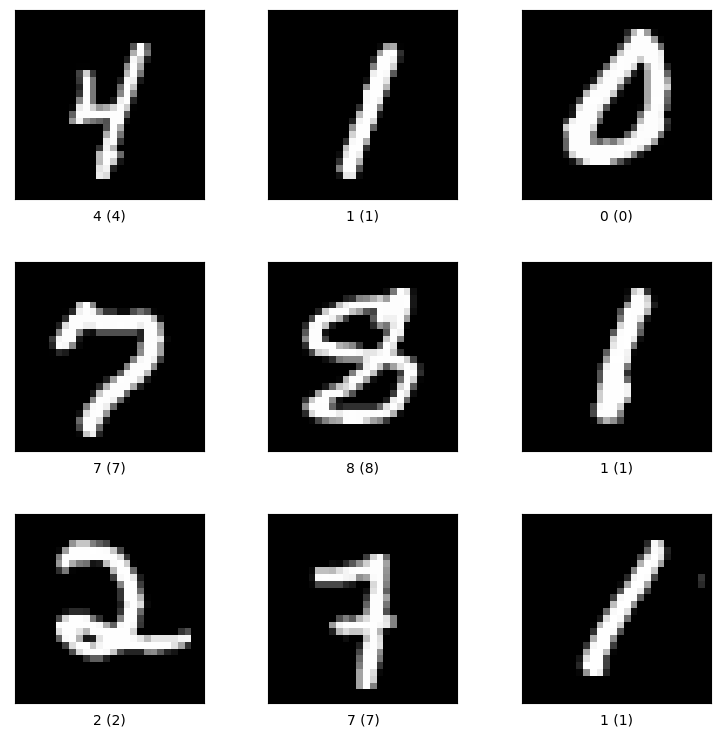

In [16]:
#show sample images from the train dataset
sample_train_img = tsfdataset.show_examples(ds_info,train_dataset)

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


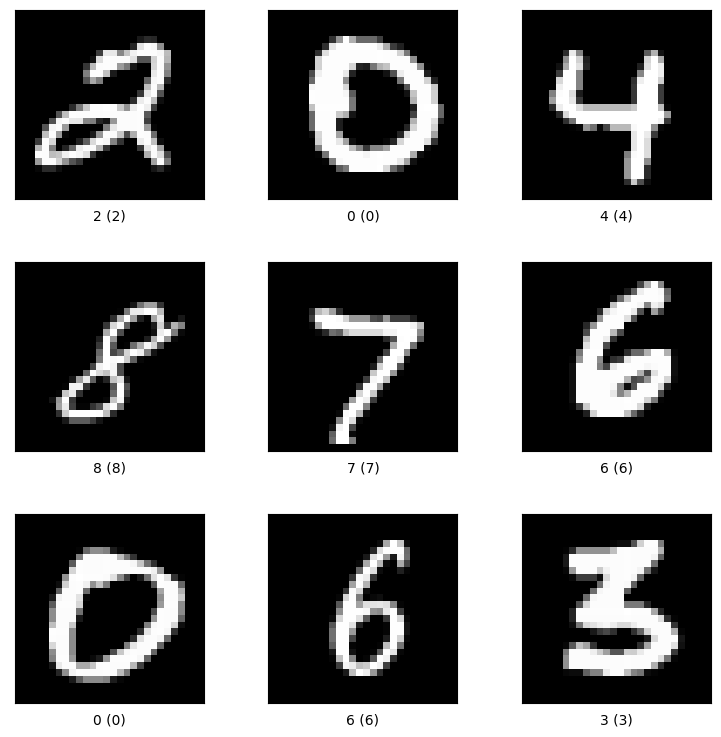

In [17]:
#show sample images from the test dataset
sample_train_img = tsfdataset.show_examples(ds_info,test_dataset)

# Preprocessing the dataset

In [33]:
#train_images = [example['image'] for example in train_dataset]
#converting the tensorflow object into numpy array
#train_images = [example['image'].numpy() for example in train_dataset]
#train images
train_images = np.array([example['image'].numpy() for example in train_dataset])
train_labels = np.array([example['label'].numpy() for example in train_dataset])

In [37]:
train_images.shape

(60000, 28, 28, 1)

In [38]:
train_labels.shape

(60000,)

In [39]:
#train images
test_images = np.array([example['image'].numpy() for example in test_dataset])
test_labels = np.array([example['label'].numpy() for example in test_dataset])

In [41]:
test_images.shape

(10000, 28, 28, 1)

In [42]:
test_labels.shape

(10000,)

In [57]:
train_images.dtype

dtype('float32')

In [55]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images/=255
test_images/=255

# train a network using a basic approach


In [67]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512,input_shape=(28,28,1),activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(10,activation='softmax')

])

model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']

)

#fit model to the images
model.fit(train_images,train_labels, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1857 - accuracy: 0.9434
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0791 - accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0554 - accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0405 - accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0332 - accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0279 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0219 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0241 - accuracy: 0.9923
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - 

In [68]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.1341 - accuracy: 0.9720


[0.13406997919082642, 0.972000002861023]